#  Introduction

this project aims to analyise and better understand **Seattle Airbnb** dataset to explore any pattrens that may beinfet the user and the bussines by understanding the trends in the data. we plan to achive that goal by implmenting **CRISP DM framework** which suggests the following steps:

**-Business Understanding**

**-Data Understanding**

**-Prepare Data**

**-Data Modeling**

**-Evaluate the Results**

***
although our proccess did not need any predicetiotn models therefore our project will look somthing like this:


**1. Business Understanding**

**2. Data Understanding**

**3. Prepare Data**

**4. Evaluate the Results**

**5. Deploy**

**NOTE:** in this project we wont deploy the results in the real life secinrios so we wont be adding that section

***

# Business Understanding
our goal from this analysis is to better understand and improve user exprince and help make the bussines more trusted among users by aswering common questions they might ask. Here are four questions to help us achive our goal :  

**1-  Whats the most booked ? :** 
       here we provide the user with one of the exambles he can expect when booking with airbnb.
       
**2-  who has the most number of rooms? :**
         the user can benift the knowledge and some contacts with hosts that have the exprince of hosting before espcialy that          they have alot of properties.
         
**3-  Whats the most booked room type? :**
       we answer here what type of room should the user expect.
       
**4-  can you get scammed ? :**
     security is big goal to maintain at airbnb. here would take in concediration few factors to determin wither it is possible      to get scammed or no.      


***

# Data Understanding
Here we are trying to understand the data size and evalute what we need to answer our questions.

first we going to read the file and import the libraries and print a sample of the dataset to evalute it:

In [104]:
#we import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 

#Read in the dataset and take a look at the first few rows here:
df = pd.read_csv('listings.csv')
df.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [105]:
df.shape

(3818, 92)

   here we found that we have **92** columns in the dataset with **3818** rows. the columns have alot of data that we may not need and can casue issues in the process so we have to clean it.

***

# Data Prepreation 
in this segment we will try to clean the data and take only what we might need in addition to handling any empty cells.

first we going to create new datafarme to store only the columns we need.
having unecssery columns may change the results and make it unaccurate or even delete some usefull data in case we used the drop method.

In [106]:
#we take the columns we need and add it to new dataframe:

new_df = df[['id','name','host_id','host_name','host_is_superhost','host_identity_verified','host_total_listings_count','property_type','room_type','accommodates','beds','bed_type','amenities','price','guests_included','number_of_reviews','review_scores_rating','instant_bookable','cancellation_policy','require_guest_phone_verification','calculated_host_listings_count']]

In [107]:
#we check how many columns and rows are there
new_df.shape

(3818, 21)


we minimized the cloumns from 92 to 21 column by creating new dataframe that stores colmuns we may need in the analsyis process.
we didnt include columns like URLs and and notes and written colmuns beacuse we dont need them to answer our questions.

In [108]:
#we check types
new_df.info();
#we notice we dont need to change (wen can change last_scraped to DATE but we wont need it)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 21 columns):
id                                  3818 non-null int64
name                                3818 non-null object
host_id                             3818 non-null int64
host_name                           3816 non-null object
host_is_superhost                   3816 non-null object
host_identity_verified              3816 non-null object
host_total_listings_count           3816 non-null float64
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
beds                                3817 non-null float64
bed_type                            3818 non-null object
amenities                           3818 non-null object
price                               3818 non-null object
guests_included                     3818 non-null int64
number_of_reviews                   3818

here we checking the types of the data in the dataframe and checking if each on is assighned to the right type.
we found that most of what we will need in our case is in the right type for examble host id and reviwe score .which will be enough in our case 

In [109]:
#How many missing values in the dataset? 
new_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             2
host_is_superhost                     2
host_identity_verified                2
host_total_listings_count             2
property_type                         1
room_type                             0
accommodates                          0
beds                                  1
bed_type                              0
amenities                             0
price                                 0
guests_included                       0
number_of_reviews                     0
review_scores_rating                647
instant_bookable                      0
cancellation_policy                   0
require_guest_phone_verification      0
calculated_host_listings_count        0
dtype: int64

we can notice we have missing data. since most of the columns have only few rows with missing data we can drop them.
in additon to haivng one column with many missing  data. therefore we decieded to drop for few reasons:

- trying to fill it or leaving it empty will effect our results.
- review scores is an important factor for our results so we cant risk effecting the results.

In [110]:
#drop null values
new_df=new_df.dropna()


we dropped the rows with missing data so it doesnt effect our data.

for example :
it is imporntant to us that each one has review score to have a good idea of the ratings.

we chose to drop beacuse trying to fill the empty cells will cause bais to the data so in this case we found that dropna is the suitible method here

In [111]:
#how many diplicated hosts id?
new_df[['host_id']].duplicated().sum()


883

by this step we learnd that theres hosts who owns more than one property.

In [112]:
#how many diplicated rows?
new_df[['id']].duplicated().sum()



0

here we made sure that theres no property that got duplicated and posted again.

In [113]:
#After dropping
new_df.shape

(3171, 21)

In [114]:
new_df

,id,name,host_id,host_name,host_is_superhost,host_identity_verified,host_total_listings_count,property_type,room_type,accommodates,...,bed_type,amenities,price,guests_included,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count
0,241032,Stylish Queen Anne Apartment,956883,Maija,f,t,3.0,Apartment,Entire home/apt,4,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,2,207,95.0,f,moderate,f,2
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,t,t,6.0,Apartment,Entire home/apt,4,...,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,1,43,96.0,f,strict,t,6
2,3308979,New Modern House-Amazing water view,16708587,Jill,f,t,2.0,House,Entire home/apt,11,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,10,20,97.0,f,strict,f,2
4,278830,Charming craftsman 3 bdm house,1452570,Emily,f,t,2.0,House,Entire home/apt,6,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,6,38,92.0,f,strict,f,1
5,5956968,Private unit in a 1920s mansion,326758,Andrew,f,t,1.0,House,Private room,2,...,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",$120.00,1,17,95.0,f,strict,f,1
6,1909058,Queen Anne Private Bed and Bath,2497928,Gary And Beth,t,t,1.0,House,Private room,2,...,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",$80.00,1,58,99.0,f,moderate,f,1
7,856550,Tiny Garden cabin on Queen Anne,4016632,Jean-Marc,t,t,5.0,Cabin,Private room,2,...,Real Bed,"{""Wireless Internet"",""Pets live on this proper...",$60.00,1,173,97.0,f,strict,t,5
8,4948745,Urban Charm || Downtown || Views,2166277,Aliza,f,t,1.0,Apartment,Private room,2,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$90.00,1,8,97.0,f,strict,f,1
9,2493658,Airy + Bright Queen Anne Apartment,5177328,Andrea,t,t,6.0,Apartment,Entire home/apt,4,...,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,1,32,97.0,f,strict,t,6
10,175576,Private Apartment - Queen Anne Hill,239585,Ray & Eileen,t,t,1.0,House,Entire home/apt,2,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$95.00,2,181,97.0,f,moderate,f,1


In **Data preperation** segment we did:
- we created new dataframe to store the colmuns we need.
- we droped the rows with missing data.
- we checked for duplicates by searching by host id and property id to make sure each property got posted once.
- we learnd that theres some hosts that has more than one property.
- the new dataframe has **21** columns and **3171** rows.

***

#  Data analysis 
Here we are going to start modeling to answer our questions. we going to prepare the code to visualize and optmize the new dataframe for each question then store it in its own varibals: 

first we made a function to simplfiy and clean the process of ploting bar chart :

In [115]:
"""
Here i created a Function that takes :
   -the dataframe.
   -the column for x-axis.
   -the column for y-axis.

this function will be used to graph question 1 and 2.
"""

def PlotBar(dataframe,x,y):
  return dataframe.plot.bar(x, y); 

 Q1: Whats the most booked ?

to answer this question we created new dataframe then sorted it by highest number of reviews:

In [116]:
#we sort by number of reviews which indicates how many times the property got booked and used therefore have reviewe
result1 = new_df[['host_id', 'name','number_of_reviews','require_guest_phone_verification']].sort_values('number_of_reviews', ascending=False).head()
result1

,host_id,name,number_of_reviews,require_guest_phone_verification
1447,1025723,contemporary art loft downtown [7],474,t
1441,1025723,contemporary art loft downtown [17],466,t
3083,102684,"Beautiful, Quiet, Friendly Ballard",404,f
3600,212740,Capitol Hill Suite + Free Parking,353,f
2568,308927,Guest Studio - North Capitol Hill,320,t


***

Q2: who has the most number of rooms?

here we needed to create varibal that holds the sorted data frame by listings count. 

the problem here is that it will print all propertis by all hosts that has many which will make it hard to solve.

therefore we droped dublicates, you can see the process done step by step in the comments below:

In [117]:
#first i sorted the "newDataframe" by listings count.
#then i dropped the unwanted columns and stored the results to "Q2_dropDub"
#finally i dropped the dublicates taking in consideration 
#the host name and host ID to keep hosts that share same names but diffrent ID.
#then we print.

Q2=new_df.sort_values('calculated_host_listings_count',ascending=False)
Q2_dropDup = Q2[['host_id','host_name','calculated_host_listings_count' ,'host_is_superhost','host_identity_verified']]
result2=Q2_dropDup.drop_duplicates(subset=["host_name", "host_id"]).head()
result2




,host_id,host_name,calculated_host_listings_count,host_is_superhost,host_identity_verified
2853,1243056,Andrew,37,f,t
795,3074414,Melissa,34,f,t
1373,430709,Sea To Sky Rentals,31,f,t
2151,26967583,Dario,21,f,f
3527,7354306,Michael,18,f,f


***

Q3: Whats the most booked room type?

for this question we grouped the dataframe by room and summed the total then stored it to the variable of the question:

In [118]:
#we group by room type to check which has the most reviwes indcating most booking and then we sort:
result3 = new_df.groupby(['room_type'])['number_of_reviews'].sum()
resul3=result3.sort_values(ascending=False)
resul3


room_type
Entire home/apt    52449
Private room       30867
Shared room         1513
Name: number_of_reviews, dtype: int64

In [119]:
#here we check if the total above equals the total reviwes in the new dataframe :
new_df['number_of_reviews'].sum()

84829

we checked if the total is equlas to sum of the reviwes which is our indicator to the number of booking times.

***

Q4:  can you get scammed ?


to answer the last quetion we considered few factors of secuirty such as phone number and verifiection of identity:

In [120]:
#here we check how many properties ask for phone verification:
result4 = new_df.groupby(['require_guest_phone_verification'])['name'].count()
result4=result4.sort_values(ascending=False)
result4=result4/3171*100
result4

require_guest_phone_verification
f    89.025544
t    10.974456
Name: name, dtype: float64

In [121]:
#here we check how many hosts have thier identity verified:
result4_p2 = new_df.groupby(['host_identity_verified'])['name'].count()
result4_p2=result4_p2.sort_values(ascending=False)
result4_p2=result4_p2/3171*100
result4_p2

host_identity_verified
t    81.993062
f    18.006938
Name: name, dtype: float64

In [122]:
#we check the how many hosts are super hosts:
result4_p3 = new_df.groupby(['host_is_superhost'])['name'].count()
result4_p3=result4_p3.sort_values(ascending=False)
result4_p3=result4_p3/3171*100
result4_p3

host_is_superhost
f    76.316619
t    23.683381
Name: name, dtype: float64

In [123]:
#we printed a dataframe that can show all the factors we took in consideration 
result4_q4 = new_df[['host_id', 'host_name','number_of_reviews','require_guest_phone_verification','host_is_superhost','host_identity_verified']].sort_values('number_of_reviews', ascending=False).head(10)
result4_q4

,host_id,host_name,number_of_reviews,require_guest_phone_verification,host_is_superhost,host_identity_verified
1447,1025723,Dirk & Jaq,474,t,f,t
1441,1025723,Dirk & Jaq,466,t,f,t
3083,102684,Amanda,404,f,t,f
3600,212740,Shalini,353,f,f,f
2568,308927,John,320,t,t,t
1499,391714,Lauren,319,f,f,t
2166,8993,Maddy,297,t,f,t
2690,1382925,Calen,294,f,f,t
2456,187753,Kevin & Jennifer,287,f,f,t
2668,555957,Alexia,279,f,f,t



this set shows our factors that we took to answer this question.

**Note:** here we cant use the function to plot since we are ploting calculated percentiges



***                                                                                       ***



# Evaluate the Results
in this last part we are going to run the code evaulate wither it looks right and visualize the results:

 # Q1: Whats the most booked ?
 
 we going to use our **PlotBar Function** here to plot the graph:

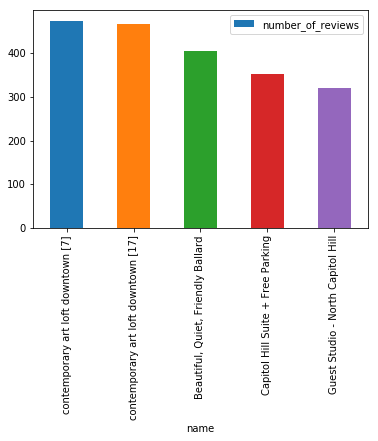

In [124]:
#we Graph it using using our Function:
PlotBar(result1 ,x='name', y='number_of_reviews'); 

We took number of reviwes on a property to indcate how many times it got booked and therefore we can see in the graph that **contemporary art loft downtown [7]** was the most booked property in seattle that year  


***

# Q2: who has the most number of rooms?

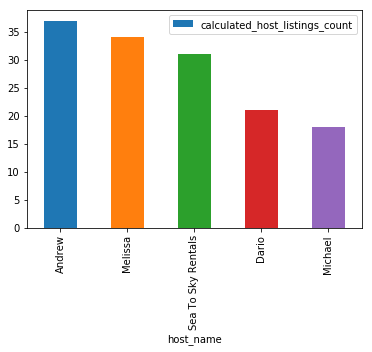

In [125]:
#we graph:
PlotBar(result2,x='host_name', y='calculated_host_listings_count'); 

We found that the host with ID number **1243056** own the most properties by **37 listings** in seattle on airbnb.
and after looking for the ID we found that the ID owner is **Andrew** 

***

# Q3: what is the most booked room type?

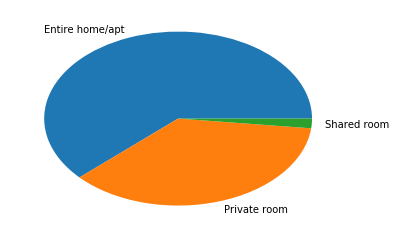

In [126]:
#we graph using Pie chart:
mylabels = ["Entire home/apt", "Private room", "Shared room"]
plt.pie(result3,labels=mylabels)
plt.show() 

The most poublur proprty type is **Entire home** where people pprovied thier entire home for guests

***

# Q4: Can you get scammed?

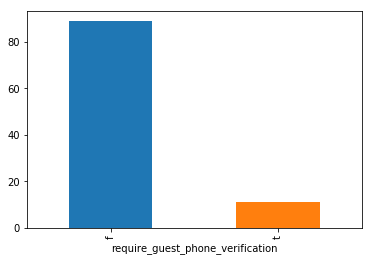

In [127]:
#we graph:
result4.plot.bar(y='require_guest_phone_verification'); 


almost **90%** of the hosts dose not require phone verification.
although 50% of the top 10 hosts dose require it.

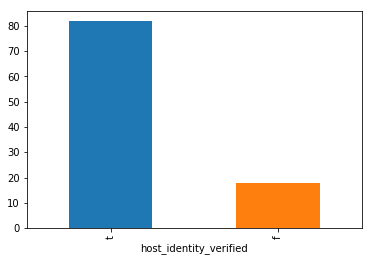

In [128]:
result4_p2.plot.bar(y='host_identity_verified'); 

**80%**  of the hosts has thier identity verified

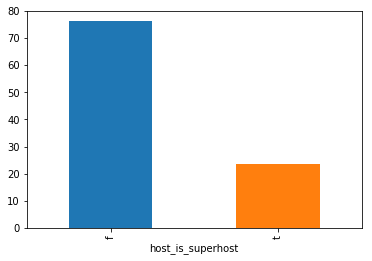

In [129]:
result4_p3.plot.bar(y='host_identity_verified'); 

 **80%** of hosts in seattle have thier identity verified and **24%** of total hosts in seattle are super hosts